# Predicting the number of Covid fatalities in London neighborhoods 
# - model development

The idea of creating this notebook came to my mind when I observed an interesting map of "COVID-19 deaths rates for small areas of London (known as MSOAs)".
Developed by City Intelligence for **__[DataStore London](https://data.london.gov.uk/dataset/covid-19-deaths-mapping-tool)__** the map and the associated dataset is supposed to enable Londoners to observe how COVID-19 deaths in their area may relate to social and demographic structure of the local population. Deprivation and poverty, age and ethnic structure of the neighborhood, extent of pre-existing health conditions and occupational data were considered as possible predictors of number of Covid-19 fatalities. Previous studies had shown "**the mortality risk from COVID-19 is higher for people of older age groups, for men, for people with pre-existing health conditions, and for people from BAME backgrounds. London boroughs had some of the highest mortality rates from COVID-19"** according to the Office for National Statistics (ONS). 
The same source observed "mortality is associated with exposure to occupations classified ‘at risk’ and area deprivation. However, there are still many question marks about COVID-19-related mortality. 
The authors of the mentioned map observed the interaction between occupation and ethnicity needs to be further investigated as none of above mentioned factors, considered alone, is strogly enough associated with deaths for these small areas. **"In some cases it may relate to the age of the population, in others it may relate to the prevalence of underlying health conditions, area deprivation or the proportion of the population working in ‘at risk occupations’, and in some cases a combination of these or none of them"** (__[DataStore London](https://data.london.gov.uk/dataset/covid-19-deaths-mapping-tool)__, 2020).

The following Jupyter notebook reveals the necessary steps for importing the data and performing the initial data engineering steps (cleaning, renaming of features)

* The analysed dataset included the fatalities declared between 1 March 2020 until 17 April 2020 and reported by 20 April 2020.  

* This **Jupyter Notebook** represents an **example** of application of exploratory data analysis (EDA) and visual analysis. 

## Step 1: Activating the necessary package for Python to run the analysis
### Importing the dataset and renaming the features 

In [1]:
# Importing relevant packages

import pandas as pd 
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as pet
import matplotlib.colors as colors
%matplotlib inline
## setting the working directory from which csv dataset will be imported  
import os

#Change the Working Directory
## To avoid some repeated import errors I uploaded the dataset from my own laptop.  
os.chdir("C://@@ Default Folder Python Notebooks")

C:\Users\nastu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
## Importing the dataset with all neighborhoods / wards from London from local folder. 
dataset = pd.read_csv('Covid MSOA London.csv', encoding='ANSI')

### In case of interest you can download the dataset from this web link: 

**__[Access the Dataset here](https://github.com/sebastianBIanalytics/Data_Science_Machine_Learning_Python/blob/master/Data/Covid%20MSOA%20London.csv)__**

In [3]:
dataset.shape

(983, 20)

In [4]:
# Rename Variables 
dataset = dataset.rename(columns={'ï»¿MSOA11CD': 'MSOA_code',
                        'MSOA11NM': 'MSOA',
                        'Local authority':'BOROUGH',
                        'covid_19_deaths': 'Fatalities',
                        'covid_19_deaths_per_thousand': 'Fatalities per thousand',
                        'total_population_mid_2018': 'Population',
                        'over_70_prop': '70+ %',
                        'proportion_at_risk_jobs': 'Jobs at risk %',
                        'insecure_proportion': 'Insecure Jobs %',
                        'all_bame_prop': 'BAME %',
                        'all_black_prop': 'Black %',
                        'pakistani_or_bangladeshi_prop': 'Pakistani/Bangladeshi %',
                        'all_indian_prop': 'Indians %',
                        'child_poverty_prop': 'Child Poverty %',
                        'total_registered_patients': 'Patients'})        

In [5]:
dataset.head()

,MSOA_code,MSOA,BOROUGH,Fatalities,Fatalities per thousand,Population,70+ %,Jobs at risk %,Insecure Jobs %,BAME %,Black %,Pakistani/Bangladeshi %,Indians %,Child Poverty %,Patients,Hypertension,Obesity (18+),Diabetes,Asthma,Coronary heart disease
0,E02000001,City of London 001,City of London,3,0.344590,8706,0.123593,0.120794,0.077743,0.213695,0.026169,0.033627,0.029288,0.052592,8584,7.95,3.62,2.70,3.08,1.50
1,E02000002,Barking and Dagenham 001,Barking and Dagenham,2,0.259067,7720,0.103886,0.345813,0.318841,0.350111,0.167232,0.047970,0.039852,0.273855,8315,9.26,6.15,4.99,3.91,1.88
2,E02000003,Barking and Dagenham 002,Barking and Dagenham,3,0.271469,11051,0.085965,0.309099,0.260850,0.453858,0.161075,0.104629,0.080836,0.246672,11873,10.33,7.60,5.79,4.64,1.83
3,E02000004,Barking and Dagenham 003,Barking and Dagenham,9,1.366535,6586,0.124658,0.311407,0.265570,0.190230,0.104982,0.016338,0.007603,0.201967,6852,9.34,8.36,4.95,3.58,1.93
4,E02000005,Barking and Dagenham 004,Barking and Dagenham,5,0.488806,10229,0.066282,0.337135,0.322392,0.337304,0.168769,0.058748,0.035155,0.231935,11150,9.37,8.79,5.15,4.26,1.47


In [6]:
# Number of rows
print(dataset.shape)

(983, 20)


In [7]:
# Column names
print(dataset.columns.tolist())

['MSOA_code', 'MSOA', 'BOROUGH', 'Fatalities', 'Fatalities per thousand', 'Population', '70+ %', 'Jobs at risk %', 'Insecure Jobs %', 'BAME %', 'Black %', 'Pakistani/Bangladeshi %', 'Indians %', 'Child Poverty %', 'Patients', 'Hypertension', 'Obesity (18+)', 'Diabetes', 'Asthma', 'Coronary heart disease']


In [8]:
## Identify if dataset contains missing values.  

df = dataset
dataset.isnull().sum().sort_values()

MSOA_code                  0
Diabetes                   0
Obesity (18+)              0
Hypertension               0
Patients                   0
Child Poverty %            0
Indians %                  0
Pakistani/Bangladeshi %    0
Black %                    0
BAME %                     0
Insecure Jobs %            0
Jobs at risk %             0
70+ %                      0
Population                 0
Fatalities per thousand    0
Fatalities                 0
BOROUGH                    0
MSOA                       0
Asthma                     0
Coronary heart disease     0
dtype: int64

In [9]:
# Data types
print(dataset.dtypes)

MSOA_code                   object
MSOA                        object
BOROUGH                     object
Fatalities                   int64
Fatalities per thousand    float64
Population                   int64
70+ %                      float64
Jobs at risk %             float64
Insecure Jobs %            float64
BAME %                     float64
Black %                    float64
Pakistani/Bangladeshi %    float64
Indians %                  float64
Child Poverty %            float64
Patients                     int64
Hypertension               float64
Obesity (18+)              float64
Diabetes                   float64
Asthma                     float64
Coronary heart disease     float64
dtype: object


## Selecting the necessary features to create a predictive model 

Using the pairplot below which includes all numerical variables in the dataset, and the heatmap of correlation coefficients, it was decided only the following features will be kept for further analysis.  

* percent of **70+**, 
* percent of **Jobs at risk**, 
* percent of **Black** and 
* percent of **Indians**, 
* percent with **Hypertension**, 
* percent with **Diabetes**, and 
* percent with **Coronary heart disease** in the MSOA.

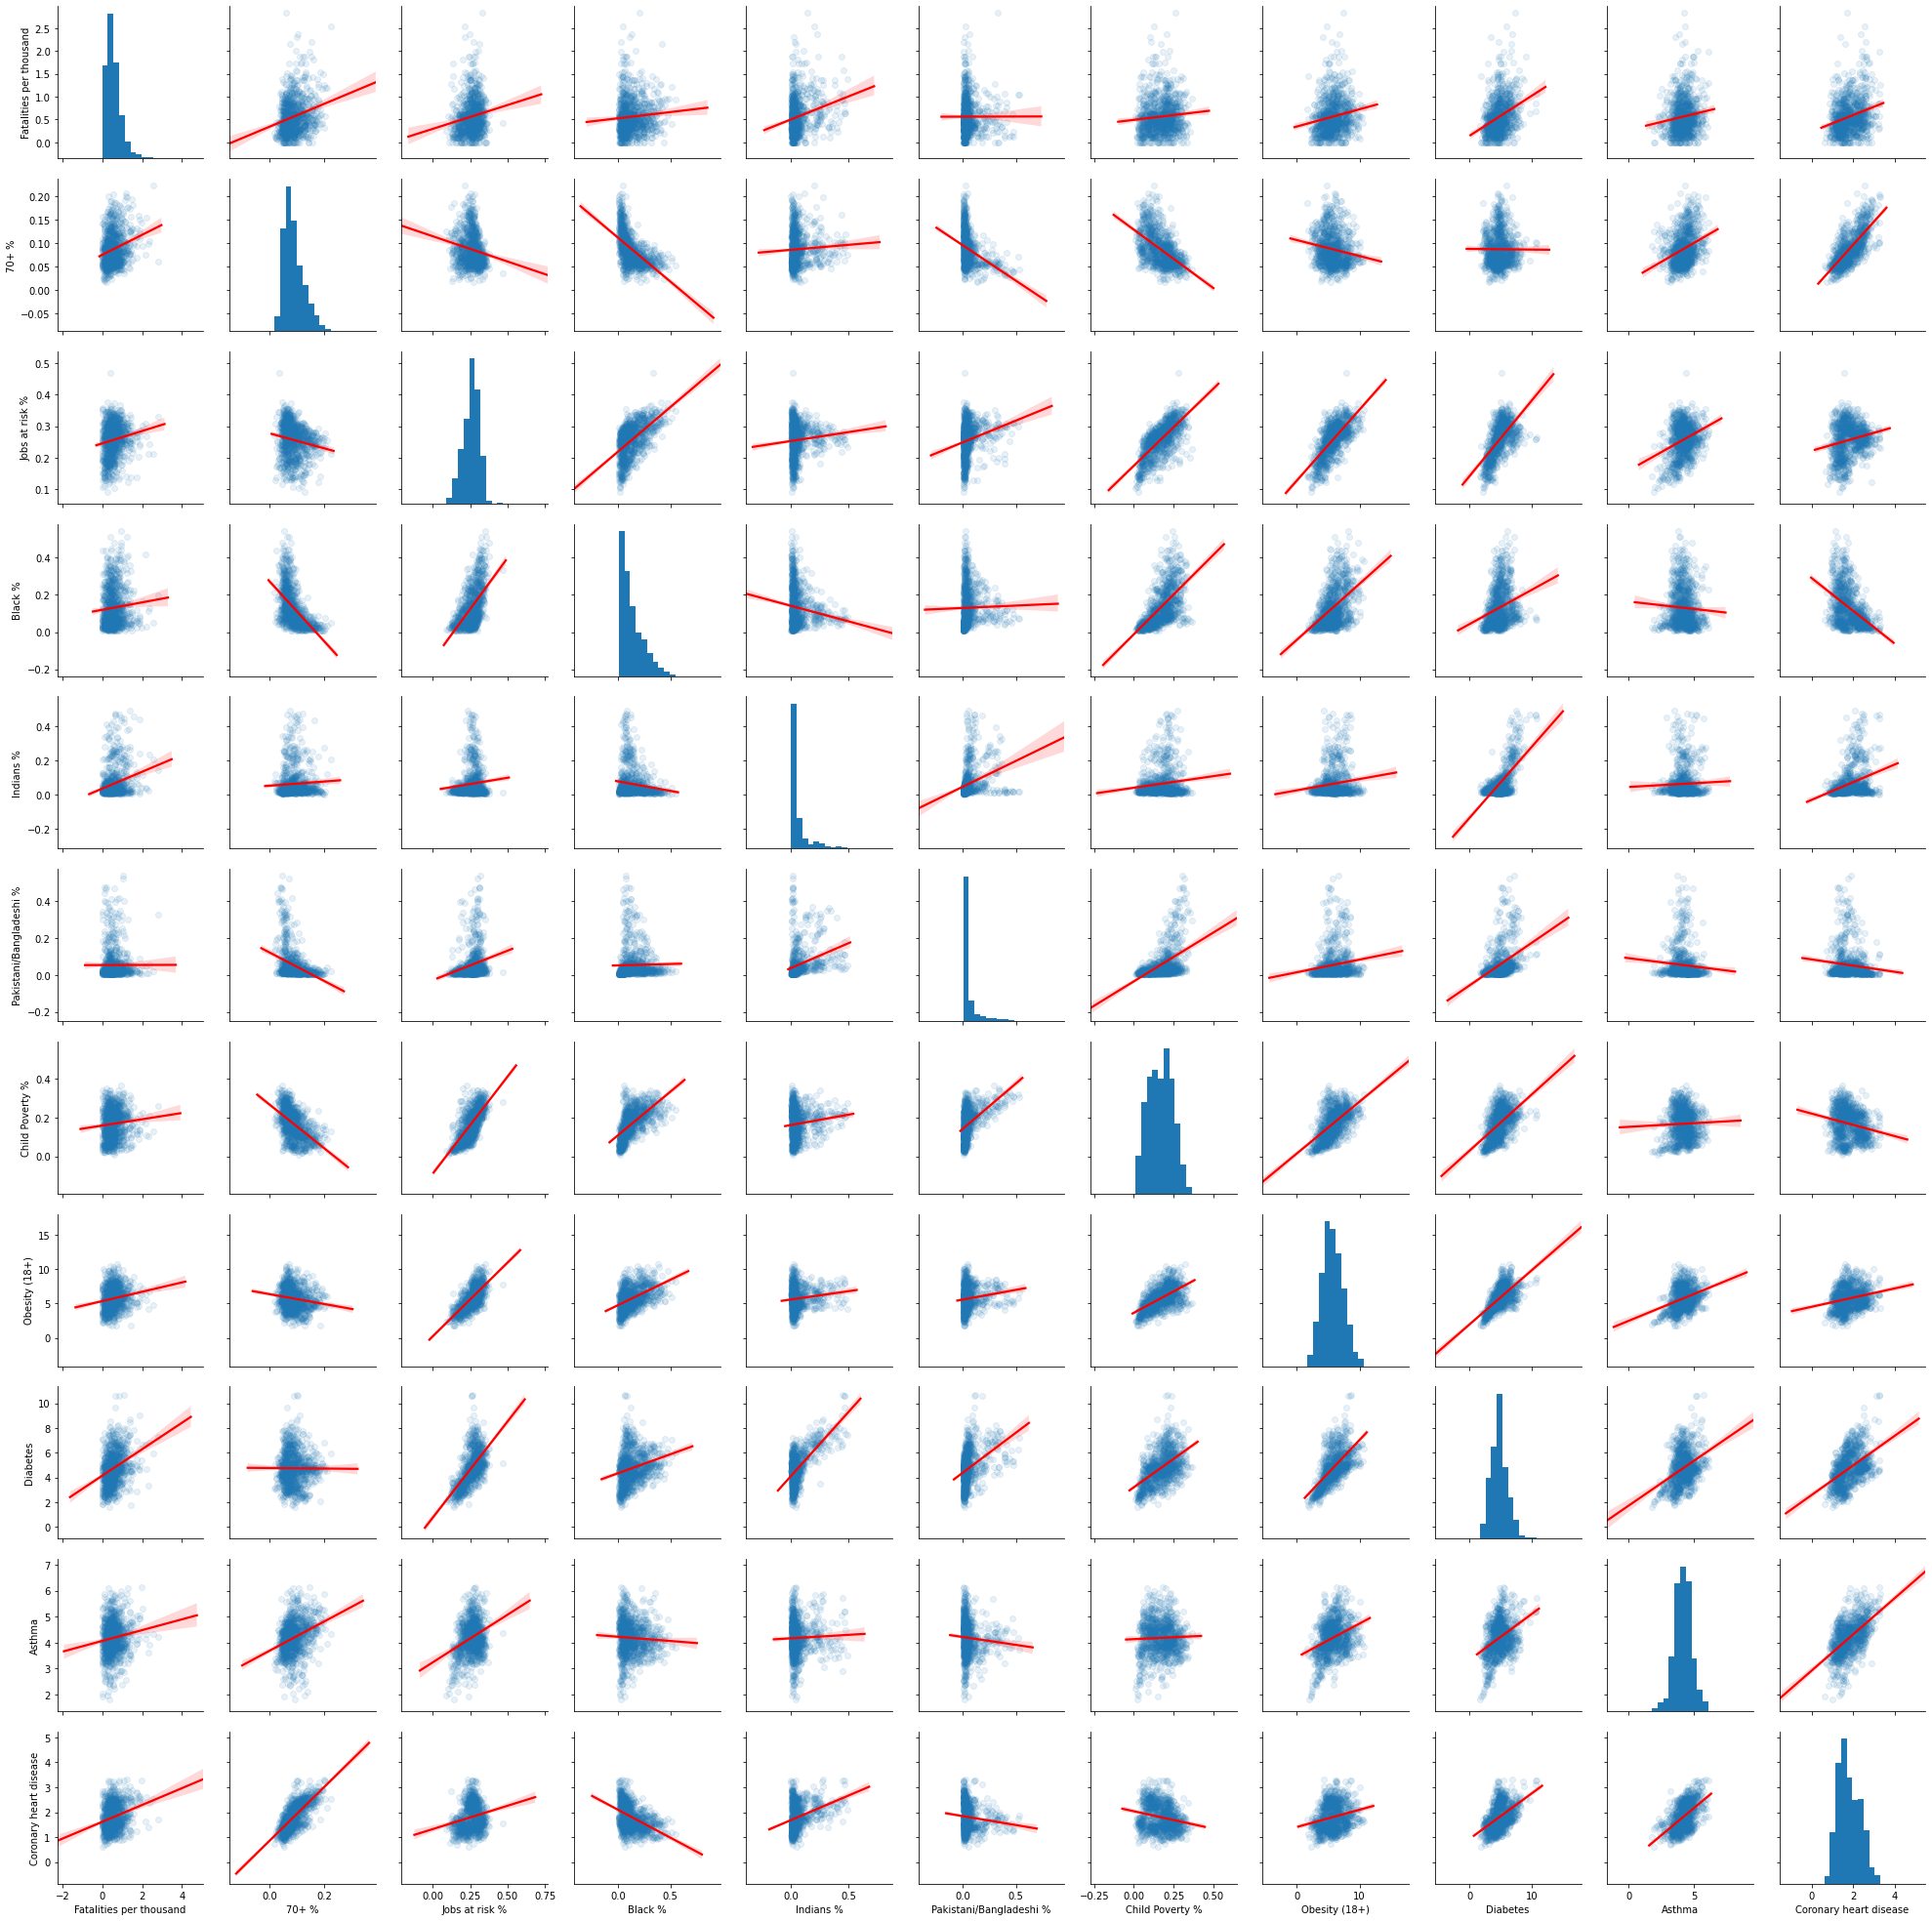

In [10]:
sns.pairplot(dataset[['Fatalities per thousand', '70+ %', 'Jobs at risk %', 'Black %', 'Indians %','Pakistani/Bangladeshi %', 
                 'Child Poverty %', 'Obesity (18+)', 'Diabetes', 'Asthma','Coronary heart disease']], 
             kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

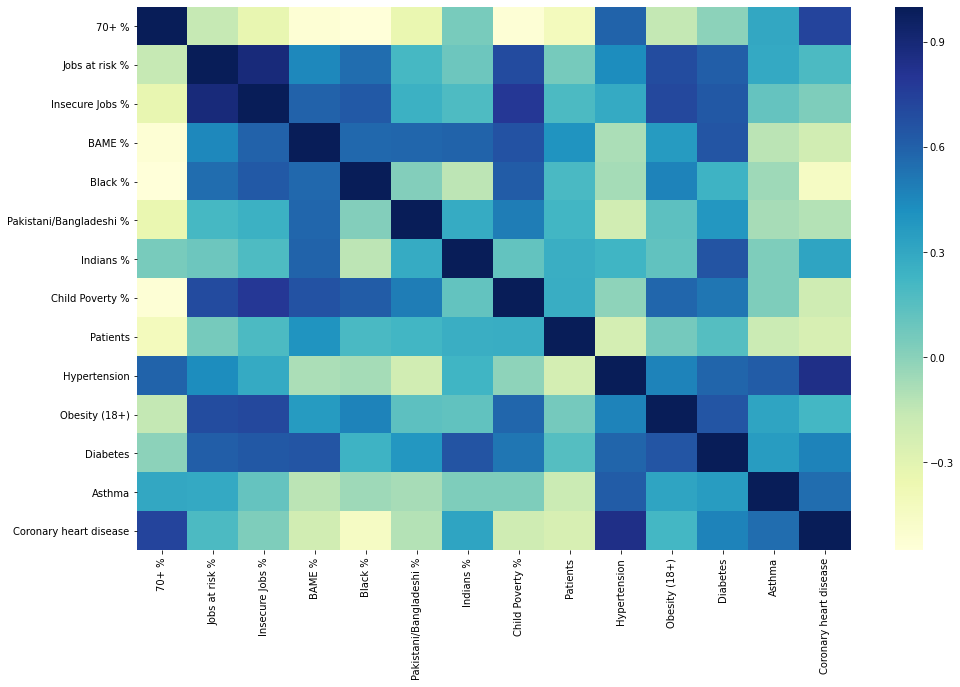

In [11]:
datacorel = dataset.drop(columns=[ 'MSOA_code', 'MSOA', 'BOROUGH', 'Fatalities', 
                                  'Fatalities per thousand', 'Population'])

plt.figure(figsize = (16,10))
sns.heatmap(datacorel.corr(),annot = False, cmap="YlGnBu")


In [12]:
# Selecting the features for further analysis
  
Features = dataset[['Fatalities per thousand', '70+ %', 'Jobs at risk %', 'Indians %', 'Black %','Hypertension', 'Diabetes', 'Coronary heart disease']]


## Brief description of the data

In [13]:
stats_df = Features.describe()
stats_df.loc['min']
stats_df.loc['max']

out_fields = ['mean','25%','50%','75%', 'min', 'max']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,Fatalities per thousand,70+ %,Jobs at risk %,Indians %,Black %,Hypertension,Diabetes,Coronary heart disease
mean,0.561541,0.086806,0.256513,0.063838,0.130970,10.028423,4.741556,1.802187
25%,0.300897,0.060209,0.224707,0.017850,0.049274,8.500000,3.845000,1.390000
median,0.490136,0.079564,0.262953,0.031192,0.099700,10.010000,4.690000,1.720000
75%,0.735479,0.106673,0.294113,0.064754,0.190551,11.480000,5.490000,2.205000
min,0.000000,0.016901,0.092176,0.003494,0.007140,4.100000,1.610000,0.600000
max,2.827037,0.222585,0.469497,0.492892,0.545031,15.980000,10.650000,3.310000


* In London MSOAs the number of Covid fatalities per 1000 people ranges from  0 to 2.8 with an average of 0.56 and a median of 0.49.
* The percentage of 70+ people ranges from 1.6% to 22% with an average of 8.6% and a median of 7.9%.
* The percentage of jobs at risk in each MSOA ranges from 9.2% to 47% with an average of 2.5% and a median of 2.6%.
* The percentage of Indian ethnics in each MSOA ranges from 0.3% to 49% with an average of 6.3% and a median of 1.7%.
* The percentage of Black ethnics ranges from 0.7% to 55% with an average of 13% and a median of 9.9%.
* The percentage of patients with hypertension per 1000 people ranges from 4.1 to 16 with an average of 10% and a median of 10%.
* The percentage of patients with diabetes per 1000 people ranges from 1.6 to 11 with an average of 4.7 and a median of 4.7.
* The percentage of patients with coronary heart peroblems per 1000 people ranges from 0.6 to 3.3 with an average of 1.8 and a median of 1.7.


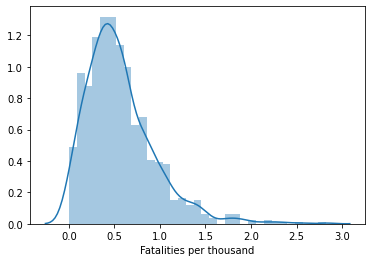

In [14]:
sns.distplot(dataset['Fatalities per thousand'])

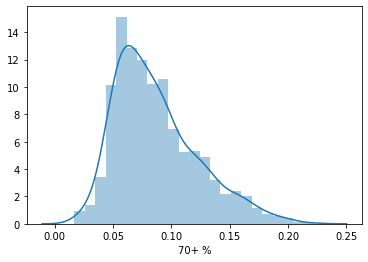

In [15]:
sns.distplot(dataset['70+ %'])

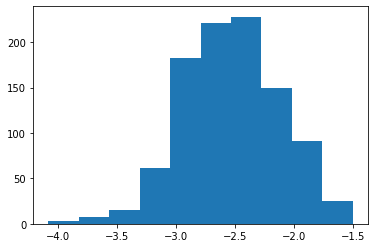

In [16]:
data = dataset['70+ %']
plt.hist(np.log(data));

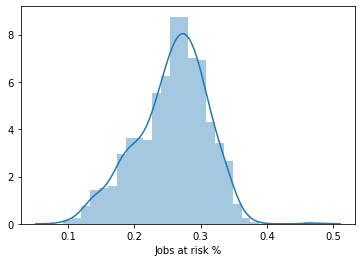

In [17]:
sns.distplot(dataset['Jobs at risk %'])

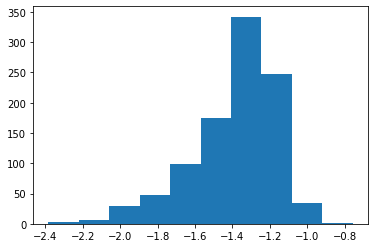

In [18]:
data = dataset['Jobs at risk %']
plt.hist(np.log(data));

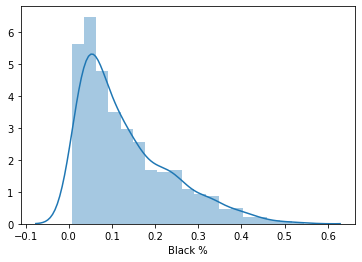

In [19]:
sns.distplot(dataset['Black %'])

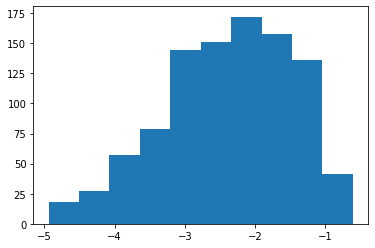

In [20]:
data = dataset['Black %']
plt.hist(np.log(data));

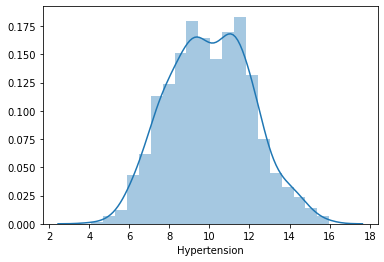

In [21]:
sns.distplot(dataset['Hypertension'])

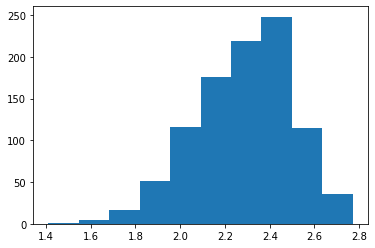

In [22]:
data = dataset['Hypertension']
plt.hist(np.log(data));

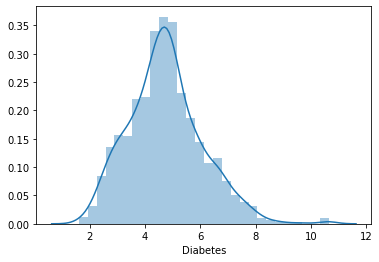

In [23]:
sns.distplot(dataset[ 'Diabetes'])

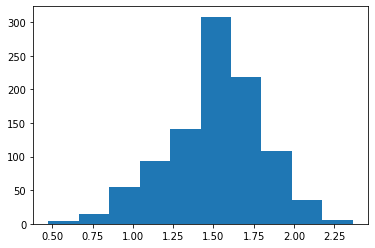

In [24]:
data = dataset[ 'Diabetes']
plt.hist(np.log(data));

The normality of each of the features was assessed using histograms and also the natural logarithm transformation was applied to each of the variables. 
As the plots above reveal there is no need to include transformed variables in the following predictive model. 

## 3. Creating a Predictive Model 

Following the visualisation of association between different variables and the Covid-19 fatalities it can be concluded the 
following predictors can be included in the predictive (multiple regression) model: 
* percent of **70+**, 
* percent of **Jobs at risk**, 
* percent of **Black** and 
* percent of **Indians**, 
* percent with **Hypertension**, 
* percent with **Diabetes**, and 
* percent with **Coronary heart disease** in the MSOA.

* In the following steps a multiple linear regression will be performed as baseline. 
* This will be followed by the same model with a polynomial effect added
* Finally a a ridge regression will be performed.  

In [25]:
# Putting feature variable to X
  
X = dataset[['70+ %', 'Jobs at risk %', 'Indians %', 'Black %','Hypertension', 'Diabetes', 'Coronary heart disease']]

# Putting response variable to y
y = dataset['Fatalities per thousand']

In [26]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1906)

**Fit `StandardScaler` on `X_train`**

In [28]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.fit_transform(X_test)

## Multiple Linear Regression (baseline)

* In the following steps a multiple linear regression will be performed as baseline.
* This will be followed by the same model with a polynomial effect added
* Finally a a Ridge and a Lasso regressions will be performed.


In [37]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)



In [29]:
LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)}, 
                          name='Dataframe not encoded'))


# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

,Dataframe not encoded
train,0.121046
test,0.108663


In [30]:
LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train_s, y_train)
y_train_pred = LR.predict(X_train_s)
y_test_pred = LR.predict(X_test_s)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test, y_test_pred)}, 
                          name='Dataframe StandardScaler'))


# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

,Dataframe StandardScaler
train,0.121046
test,0.109074


As the standard scaler transformation produced similar results, I prefer to continue analysis with the original un-transformed data. 

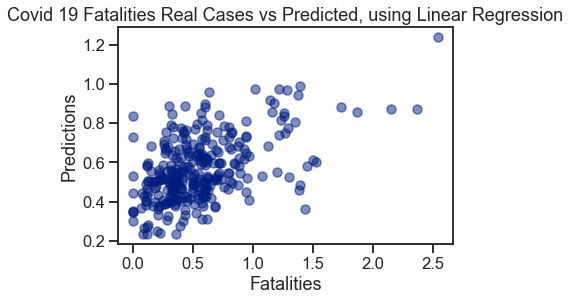

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Fatalities', 
       ylabel='Predictions',
       title='Covid 19 Fatalities Real Cases vs Predicted, using Linear Regression');

In [33]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
LR = LinearRegression()
# fit the model to the TRAINING DATA
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# print the intercept
print(LR.intercept_)

0.049946968843390116


In [35]:
# Let's see the coefficient
coeff_df = pd.DataFrame(LR.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
70+ %,5.016734
Jobs at risk %,-0.739954
Indians %,-0.006208
Black %,1.086476
Hypertension,-0.066909
Diabetes,0.121895
Coronary heart disease,0.122616


In [36]:
# Making predictions using the model on the TEST dataset

y_pred = LR.predict(X_test)

In [38]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred).round(3))
print('Error in %:', (np.mean(y_test - y_pred) / np.mean(y_pred)) * 100)
print('MSE:', metrics.mean_squared_error(y_test, y_pred).round(3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R square :',r_squared.round(3))


MAE: 0.246
Error in %: -2.317890044473235
MSE: 0.109
RMSE: 0.32964020374460307
R square : 0.266


## Model 2. Adding a Polynomial Effect to the Linear Regression model 

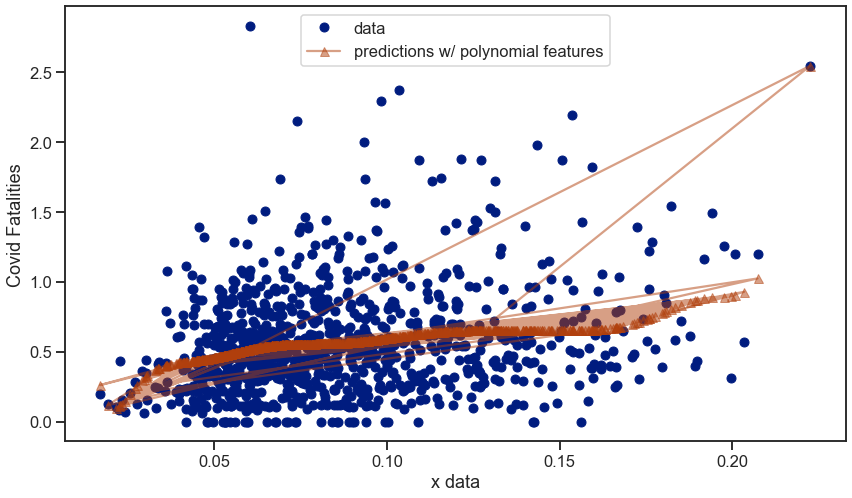

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
LR = LinearRegression()

# Extract the X- and Y- data from the dataframe 
X_data = Features[['70+ %']]
Y_data = Features['Fatalities per thousand']

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)
LR = LR.fit(X_poly, Y_data)
Y_pred = LR.predict(X_poly)

# Plot the result
# Change seaborn plot size
fig= plt.figure(figsize=(14,8))

plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)
#plt.plot(Features[['70+ %']], Features['Fatalities per thousand'], ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='Covid Fatalities');

The polynomial fitted line was ignored as it makes the plot hardly lisible. (Delete the hashtag # from the 5th line on the botton of the above cell and re-run to observe the full plot).

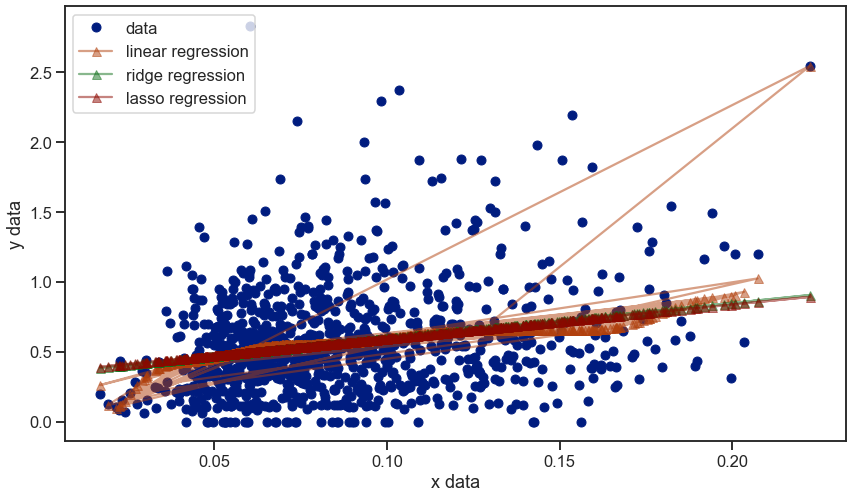

In [43]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# The ridge regression model
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# The lasso regression model
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

# The plot of the predicted values
# Change seaborn plot size
fig= plt.figure(figsize=(14,8))

plt.plot(X_data, Y_data, marker='o', ls='', label='data')
#plt.plot(Features[['70+ %']], Features['Fatalities per thousand'], ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='^', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

The polynomial fitted line was ignored as it makes the plot hardly lisible. (Delete the hashtag # from the 9th line on the botton of the above cell and re-run to observe the full plot).


In [44]:
# let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()
coefficients['linear regression'] = LR.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression

,linear regression,ridge regression,lasso regression
count,2.100000e+01,2.100000e+01,21.000000
mean,8.365281e+13,4.707286e-01,0.115738
std,1.004978e+14,9.742038e-01,0.530378
min,0.000000e+00,0.000000e+00,0.000000
25%,1.205836e+10,6.273046e-08,0.000000
50%,2.873183e+13,1.125653e-04,0.000000
75%,1.668265e+14,1.524614e-01,0.000000
max,3.040985e+14,3.374329e+00,2.430498


When the performance of all 3 regression models is performed in the plot below, it is observed the linear function performs worst while Lasso regression gives the best fit. 

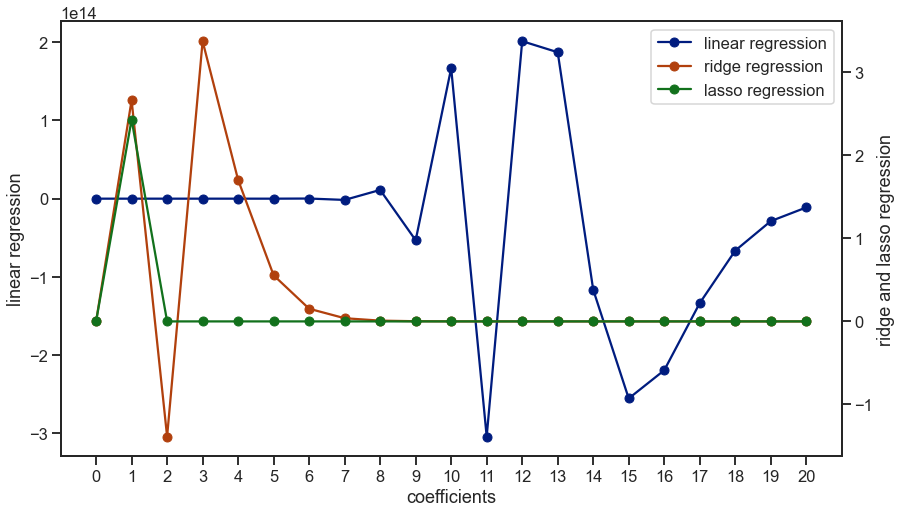

In [45]:
colors = sns.color_palette()

# Change seaborn plot size
fig= plt.figure(figsize=(14,8))


# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(LR.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
#ax1.set_ylim(-2e14, 2e14)
#ax2.set_ylim(-25, 25)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(LR.coef_)));


After performing three different regression models (linear, polynomial, Ridge and Lasso regression) we can conclude the Lasso regression performs best as show in the last two plots. 
Although both regularisation regressions are less sensitive to "noise" they still need to be improved probably by adding more predictors. 
Overall, it can be concluded that based on the dataset with Covid fatalities at neighbourhood level the predictions are not very accurate as all plots reveal. 

This might suggest more individual level data are needed and also more updated fatalities numbers. 
The patterns suggested based on the socio-demographic structure of the neighbourhood is unlikely to predict Covid 19 fatalities.  